# Java Script code to download images url from google SERP.



var urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:text/csv;charset=utf-8,' + encodeURI(urls.join('\n'));
hiddenElement.target = '_blank';
hiddenElement.download = 'images.csv';
hiddenElement.click();

#Importing fastai

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
from fastai.vision import *

In [101]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [102]:
!cp cats.csv /content/images/

In [103]:
!cp dogs.csv /content/images/

In [104]:
!cp horses.csv /content/images/

In [105]:
!cp cows.csv /content/images/

In [106]:
path = Path('/content/images/')

## Download images

In [107]:
for file, folder in [('cats.csv', 'Cats'), ('cows.csv', 'Cows'), 
                     ('dogs.csv', 'Dogs'), ('horses.csv', 'Horses')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)

## Verify images

In [132]:
doc(verify_images)

In [133]:
for folder in ('Cats', 'Cows', 'Dogs', 'Horses'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

Cats


Cows


Dogs


Horses


## View data

In [134]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [135]:
data.classes

['Cats', 'Cows', 'Dogs', 'Horses']

In [136]:
doc(data.show_batch)

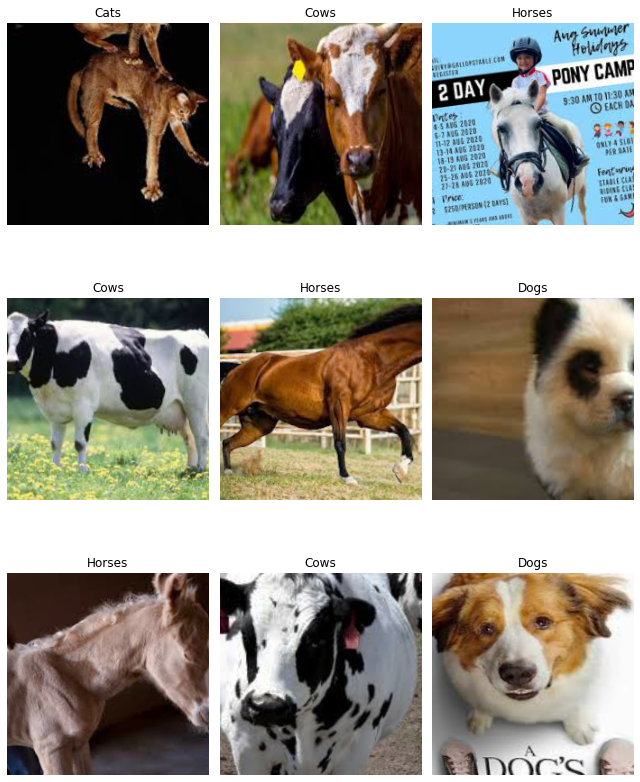

In [137]:
data.show_batch(rows=3, figsize=(9, 12))

In [138]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Cats', 'Cows', 'Dogs', 'Horses'], 4, 511, 127)

## Initial training

In [139]:
from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [140]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (511 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Horses,Horses,Horses,Horses,Horses
Path: /content/images;

Valid: LabelList (127 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Cows,Cows,Horses,Cats,Cats
Path: /content/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [141]:
doc(learn.fit_one_cycle)

In [142]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.606587,0.672911,0.196850,00:08
1,0.940021,0.308667,0.102362,00:08
2,0.674856,0.187978,0.055118,00:08
3,0.528895,0.156655,0.039370,00:08


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [119]:
learn.unfreeze()

In [143]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 4.37E-04


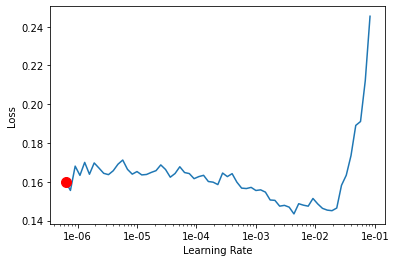

In [144]:
learn.recorder.plot(suggestion=True)

In [145]:
learn.fit_one_cycle(4, max_lr=slice(2.5e-4, 1e-06))

epoch,train_loss,valid_loss,error_rate,time
0,0.186537,0.146091,0.039370,00:08
1,0.178464,0.142444,0.039370,00:08
2,0.193711,0.146149,0.039370,00:08
3,0.181841,0.147188,0.039370,00:08


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [146]:
learn.save('stage-1')

## Interpretation

In [147]:
interp = ClassificationInterpretation.from_learner(learn)

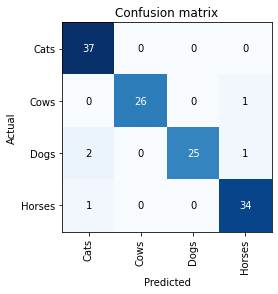

In [148]:
interp.plot_confusion_matrix()

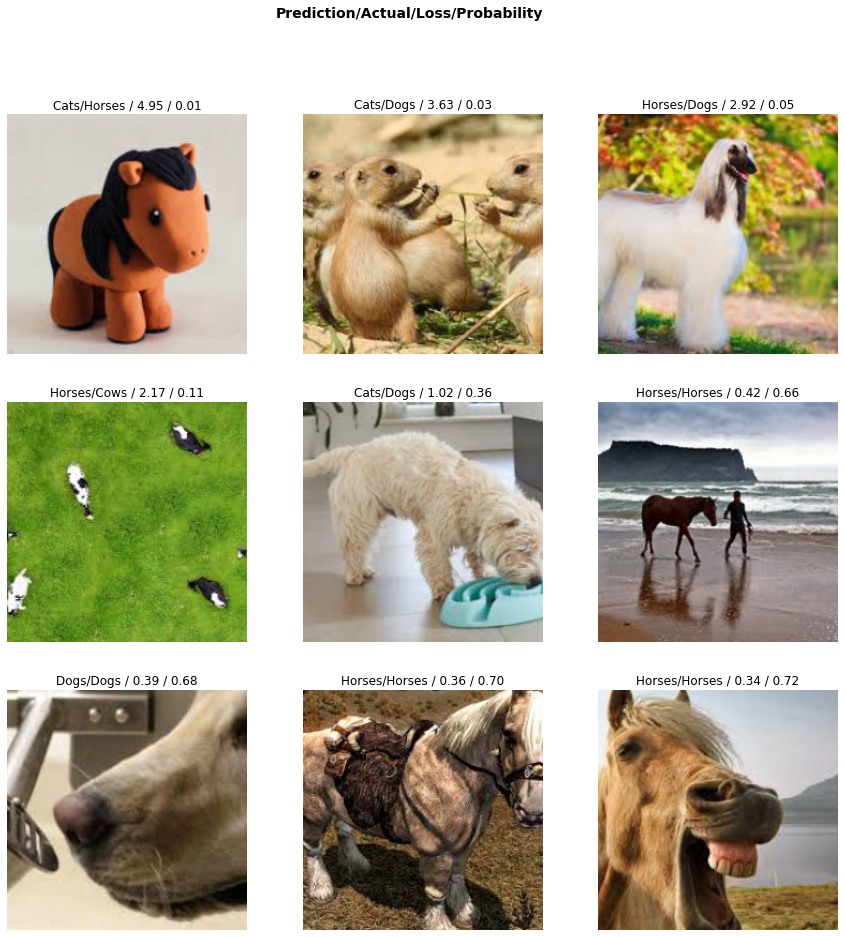

In [149]:
interp.plot_top_losses(9, figsize=(15,15))

#putting model into production

In [150]:
learn.export()

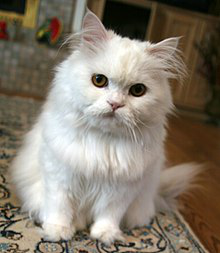

In [157]:
img = open_image('/content/ck.jpg')
img

In [163]:
learn = load_learner(path)

In [171]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(0)